### Notebook explores some Clustering  model with a small data set, the following clustering algo will be used

* Kmeans 
* hierarchical 

#### Data will be preprocessed to get cleaner data and following action will be preformed

In [1]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation 
from nltk.stem import PorterStemmer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Helper method for text preprocessing, perform the following task

* lowering of text
* tokenize the word
* remove number from text
* use stemming (use porter stemmer)
* remove special character
* remove stop words

In [2]:
# apply preprocessing to clean the corpus 
def applyPreprocessing(text) :
    
    #normalize the text 
    normalized_text = text.lower()
    
    #word tokenize
    tokens = word_tokenize(normalized_text)
    
    # Removing Numbers. as numbers do not add values in detection of spam or ham
    tokens = [token for token in tokens if not token.isnumeric()]
    
     #using PorterStemmer (other alternative SnowballStemmer, LancesterStemmer, RegexpStemmer)
    stemmer = PorterStemmer() 
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
        
     # Removing Punctuations and Special Characters
    filtered_tokens = [token for token in stemmed_tokens if token.isalnum()]
    
    #remove stop words
    stop_words = set(stopwords.words('english')) # Remove stopwords
    stopword_removed_tokens = [token for token in filtered_tokens if token.lower() not in stop_words]
    
    return ' '.join(stopword_removed_tokens)

#### Loading and preprocessing of data

In [3]:
# Load the file
df = pd.read_csv('files/smsspamcollection/SMSSpamCollection', delimiter='\t', header=None, names=['category', 'smstext'])

df['processed_smstext'] = df['smstext'].apply(applyPreprocessing)

# Convert the 'category' column to numeric representation
df['category_numeric'] = df['category'].astype('category').cat.codes
df

,category,smstext,processed_smstext,category_numeric
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail onli bugi n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt 21st...,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,thi 2nd time tri contact u pound prize claim e...,1
5568,ham,Will ü b going to esplanade fr home?,ü b go esplanad fr home,0
5569,ham,"Pity, * was in mood for that. So...any other s...",piti wa mood ani suggest,0
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...,0


#### TfIdf vectorizer to conver the data into vector, we wil be considering only feature field as no target field will be there for clustering

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

X = tfidf_vectorizer.fit_transform(df["processed_smstext"]) # this will be feature variable

print(X.shape )


(5572, 6317)


#### Apply kmeans model and find how close the data can be identified

In [5]:
from sklearn.cluster import KMeans
k = 2  #this number can be tweaked or we can use elbow method to find the optimal cluster
model = KMeans(n_clusters=k)
model.fit(X)

#the label that will be identified by the kmeans model
labels=model.labels_
labels

C:\Users\ranjit09\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

#### Output the data and compare with the actual data to see the accuracy of kmeans cluster

In [6]:
data=pd.DataFrame(list(zip(df.category_numeric,labels)),columns=['actual_category_numeric','identified_cluster'])

#pd.set_option("display.max_rows", None)
data

,actual_category_numeric,identified_cluster
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
5567,1,1
5568,0,0
5569,0,0
5570,0,0


#### Show the difference and simmilarity between this two finding using seaborn map

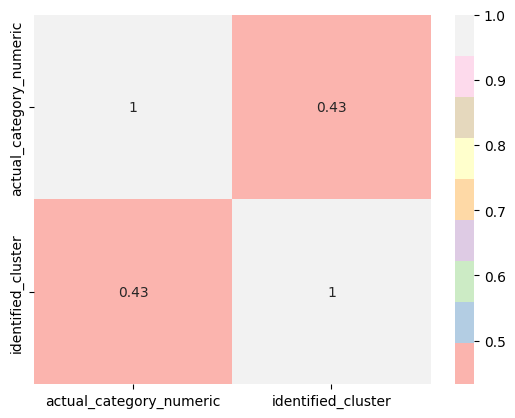

In [7]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Pastel1')

# Show the plot
plt.show()


#### Apply the above data to a AgglomerativeClustering

In [8]:
from sklearn.cluster import AgglomerativeClustering
k = 2 # two as i have only two category
agglo_model = AgglomerativeClustering(k,linkage='ward')
agglo_model.fit(X.toarray())   #the X i am getting it from above, after converting to vector using tfIdf

labels=agglo_model.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [9]:
data=pd.DataFrame(list(zip(df.category_numeric,labels)),columns=['actual_category_numeric','identified_cluster'])

#pd.set_option("display.max_rows", None)
data

,actual_category_numeric,identified_cluster
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
5567,1,0
5568,0,0
5569,0,0
5570,0,0
